# Introduction to Pandas 
(Taken from [here](https://pandas.pydata.org/pandas-docs/stable/10min.html))

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

---  
## Object creation

In [3]:
s = pd.Series([1,3,4,np.nan, 6,8])
s

0    1.0
1    3.0
2    4.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [5]:
dates = pd.date_range('20181001', periods = 6)
dates

DatetimeIndex(['2018-10-01', '2018-10-02', '2018-10-03', '2018-10-04',
               '2018-10-05', '2018-10-06'],
              dtype='datetime64[ns]', freq='D')

In [11]:
df = pd.DataFrame(np.random.randn(6,5), index=dates, columns=list('ABCDE'))
df

,A,B,C,D,E
2018-10-01,2.375460,0.012732,0.764493,0.696541,-0.143768
2018-10-02,-0.186129,1.204982,0.122408,-0.234139,0.351287
2018-10-03,1.299758,0.756601,0.174193,-1.549554,1.032485
2018-10-04,-1.307878,-0.027975,1.176405,0.038882,0.344518
2018-10-05,1.100797,1.101996,0.885448,2.312995,1.154549
2018-10-06,-0.478323,-0.431227,-0.848988,0.678029,1.003195


In [21]:
df2 = pd.DataFrame({ 'A': 2.,
                     'B' : pd.Timestamp('20181001'),
                     'C' : pd.Series(1, index=list(range(4)), dtype='float32'),
                     'D' : np.array([3] * 4, dtype='int32'),
                     'E' : pd.Categorical(['sky', 'impala', 'grey', 'abdabs']),
                     'F' : pd.date_range('20181010', periods=4),
                     'G' : 'foo'})
df2

,A,B,C,D,E,F,G
0,2.0,2018-10-01,1.0,3,sky,2018-10-10,foo
1,2.0,2018-10-01,1.0,3,impala,2018-10-11,foo
2,2.0,2018-10-01,1.0,3,grey,2018-10-12,foo
3,2.0,2018-10-01,1.0,3,abdabs,2018-10-13,foo


In [24]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F    datetime64[ns]
G            object
dtype: object

In [29]:
# df2.<TAB>

---  
## Viewing Data

In [30]:
df.head()

,A,B,C,D,E
2018-10-01,2.375460,0.012732,0.764493,0.696541,-0.143768
2018-10-02,-0.186129,1.204982,0.122408,-0.234139,0.351287
2018-10-03,1.299758,0.756601,0.174193,-1.549554,1.032485
2018-10-04,-1.307878,-0.027975,1.176405,0.038882,0.344518
2018-10-05,1.100797,1.101996,0.885448,2.312995,1.154549


In [34]:
df.tail(2)

,A,B,C,D,E
2018-10-05,1.100797,1.101996,0.885448,2.312995,1.154549
2018-10-06,-0.478323,-0.431227,-0.848988,0.678029,1.003195


In [33]:
df.index

DatetimeIndex(['2018-10-01', '2018-10-02', '2018-10-03', '2018-10-04',
               '2018-10-05', '2018-10-06'],
              dtype='datetime64[ns]', freq='D')

In [35]:
df.columns

Index(['A', 'B', 'C', 'D', 'E'], dtype='object')

In [36]:
df.values

array([[ 2.37546011,  0.0127318 ,  0.76449348,  0.6965405 , -0.14376755],
       [-0.18612852,  1.20498244,  0.12240781, -0.2341393 ,  0.35128714],
       [ 1.29975794,  0.75660104,  0.17419307, -1.54955368,  1.03248501],
       [-1.30787761, -0.02797522,  1.17640533,  0.03888204,  0.34451804],
       [ 1.1007975 ,  1.10199632,  0.88544752,  2.31299498,  1.15454906],
       [-0.47832313, -0.4312268 , -0.84898751,  0.67802901,  1.00319489]])

In [37]:
df.describe()

,A,B,C,D,E
count,6.000000,6.000000,6.000000,6.000000,6.000000
mean,0.467281,0.436185,0.378993,0.323792,0.623711
std,1.357041,0.675897,0.728929,1.274617,0.516542
min,-1.307878,-0.431227,-0.848988,-1.549554,-0.143768
25%,-0.405274,-0.017798,0.135354,-0.165884,0.346210
50%,0.457334,0.384666,0.469343,0.358456,0.677241
75%,1.250018,1.015648,0.855209,0.691913,1.025162
max,2.375460,1.204982,1.176405,2.312995,1.154549


In [39]:
df.T

,2018-10-01 00:00:00,2018-10-02 00:00:00,2018-10-03 00:00:00,2018-10-04 00:00:00,2018-10-05 00:00:00,2018-10-06 00:00:00
A,2.375460,-0.186129,1.299758,-1.307878,1.100797,-0.478323
B,0.012732,1.204982,0.756601,-0.027975,1.101996,-0.431227
C,0.764493,0.122408,0.174193,1.176405,0.885448,-0.848988
D,0.696541,-0.234139,-1.549554,0.038882,2.312995,0.678029
E,-0.143768,0.351287,1.032485,0.344518,1.154549,1.003195


In [43]:
df.sort_index(axis=0, ascending=False)

,A,B,C,D,E
2018-10-06,-0.478323,-0.431227,-0.848988,0.678029,1.003195
2018-10-05,1.100797,1.101996,0.885448,2.312995,1.154549
2018-10-04,-1.307878,-0.027975,1.176405,0.038882,0.344518
2018-10-03,1.299758,0.756601,0.174193,-1.549554,1.032485
2018-10-02,-0.186129,1.204982,0.122408,-0.234139,0.351287
2018-10-01,2.375460,0.012732,0.764493,0.696541,-0.143768


In [51]:
df.sort_index(axis=1, ascending=False)

,A,B,C,D,E
2018-10-01,2.375460,0.012732,0.764493,0.696541,-0.143768
2018-10-02,-0.186129,1.204982,0.122408,-0.234139,0.351287
2018-10-03,1.299758,0.756601,0.174193,-1.549554,1.032485
2018-10-04,-1.307878,-0.027975,1.176405,0.038882,0.344518
2018-10-05,1.100797,1.101996,0.885448,2.312995,1.154549
2018-10-06,-0.478323,-0.431227,-0.848988,0.678029,1.003195


In [52]:
df.sort_values(by='B')

,A,B,C,D,E
2018-10-06,-0.478323,-0.431227,-0.848988,0.678029,1.003195
2018-10-04,-1.307878,-0.027975,1.176405,0.038882,0.344518
2018-10-01,2.375460,0.012732,0.764493,0.696541,-0.143768
2018-10-03,1.299758,0.756601,0.174193,-1.549554,1.032485
2018-10-05,1.100797,1.101996,0.885448,2.312995,1.154549
2018-10-02,-0.186129,1.204982,0.122408,-0.234139,0.351287


In [50]:
df.sort_values(by='B', ascending=False)

,A,B,C,D,E
2018-10-02,-0.186129,1.204982,0.122408,-0.234139,0.351287
2018-10-05,1.100797,1.101996,0.885448,2.312995,1.154549
2018-10-03,1.299758,0.756601,0.174193,-1.549554,1.032485
2018-10-01,2.375460,0.012732,0.764493,0.696541,-0.143768
2018-10-04,-1.307878,-0.027975,1.176405,0.038882,0.344518
2018-10-06,-0.478323,-0.431227,-0.848988,0.678029,1.003195


---  
## Selection
Getting, selection by label, position, boolean indexing, setting

In [53]:
df['A']

2018-10-01    2.375460
2018-10-02   -0.186129
2018-10-03    1.299758
2018-10-04   -1.307878
2018-10-05    1.100797
2018-10-06   -0.478323
Freq: D, Name: A, dtype: float64

In [54]:
df[0:3]

,A,B,C,D,E
2018-10-01,2.375460,0.012732,0.764493,0.696541,-0.143768
2018-10-02,-0.186129,1.204982,0.122408,-0.234139,0.351287
2018-10-03,1.299758,0.756601,0.174193,-1.549554,1.032485


In [56]:
df['20181003':'20181005']

,A,B,C,D,E
2018-10-03,1.299758,0.756601,0.174193,-1.549554,1.032485
2018-10-04,-1.307878,-0.027975,1.176405,0.038882,0.344518
2018-10-05,1.100797,1.101996,0.885448,2.312995,1.154549


In [58]:
df.loc[dates[1]]

A   -0.186129
B    1.204982
C    0.122408
D   -0.234139
E    0.351287
Name: 2018-10-02 00:00:00, dtype: float64

In [59]:
df.loc[:, ['B', 'E']]

,B,E
2018-10-01,0.012732,-0.143768
2018-10-02,1.204982,0.351287
2018-10-03,0.756601,1.032485
2018-10-04,-0.027975,0.344518
2018-10-05,1.101996,1.154549
2018-10-06,-0.431227,1.003195


In [62]:
df.loc['20181002':'20181005', ['C', 'D']]

,C,D
2018-10-02,0.122408,-0.234139
2018-10-03,0.174193,-1.549554
2018-10-04,1.176405,0.038882
2018-10-05,0.885448,2.312995


In [63]:
df.loc['20181004', ['A', 'C']]

A   -1.307878
C    1.176405
Name: 2018-10-04 00:00:00, dtype: float64

In [64]:
df.loc[dates[1],'A']

-0.1861285180061593

In [65]:
df.at[dates[1],'A']

-0.1861285180061593

In [66]:
df.iloc[3]

A   -1.307878
B   -0.027975
C    1.176405
D    0.038882
E    0.344518
Name: 2018-10-04 00:00:00, dtype: float64

In [67]:
df.iloc[3:5, 0:3]

,A,B,C
2018-10-04,-1.307878,-0.027975,1.176405
2018-10-05,1.100797,1.101996,0.885448


In [68]:
df.iloc[[1,2,4], [0,3]]

,A,D
2018-10-02,-0.186129,-0.234139
2018-10-03,1.299758,-1.549554
2018-10-05,1.100797,2.312995


In [70]:
df.iloc[1:4, 1:4]

,B,C,D
2018-10-02,1.204982,0.122408,-0.234139
2018-10-03,0.756601,0.174193,-1.549554
2018-10-04,-0.027975,1.176405,0.038882


In [71]:
df.iloc[:, 1:3]

,B,C
2018-10-01,0.012732,0.764493
2018-10-02,1.204982,0.122408
2018-10-03,0.756601,0.174193
2018-10-04,-0.027975,1.176405
2018-10-05,1.101996,0.885448
2018-10-06,-0.431227,-0.848988


In [72]:
df.iloc[0,0]

2.3754601111165887

In [73]:
df.iat[0,0]

2.3754601111165887

In [74]:
df[df.E > 1]

,A,B,C,D,E
2018-10-03,1.299758,0.756601,0.174193,-1.549554,1.032485
2018-10-05,1.100797,1.101996,0.885448,2.312995,1.154549
2018-10-06,-0.478323,-0.431227,-0.848988,0.678029,1.003195


In [75]:
df[df < 0]

,A,B,C,D,E
2018-10-01,NaN,NaN,NaN,NaN,-0.143768
2018-10-02,-0.186129,NaN,NaN,-0.234139,NaN
2018-10-03,NaN,NaN,NaN,-1.549554,NaN
2018-10-04,-1.307878,-0.027975,NaN,NaN,NaN
2018-10-05,NaN,NaN,NaN,NaN,NaN
2018-10-06,-0.478323,-0.431227,-0.848988,NaN,NaN


In [76]:
df3 = df.copy()
df3['F'] = ['one', 'two', 'one', 'three', 'three', 'four']
df3

,A,B,C,D,E,F
2018-10-01,2.375460,0.012732,0.764493,0.696541,-0.143768,one
2018-10-02,-0.186129,1.204982,0.122408,-0.234139,0.351287,two
2018-10-03,1.299758,0.756601,0.174193,-1.549554,1.032485,one
2018-10-04,-1.307878,-0.027975,1.176405,0.038882,0.344518,three
2018-10-05,1.100797,1.101996,0.885448,2.312995,1.154549,three
2018-10-06,-0.478323,-0.431227,-0.848988,0.678029,1.003195,four


In [78]:
df3[df3['F'].isin(['three', 'four'])]

,A,B,C,D,E,F
2018-10-04,-1.307878,-0.027975,1.176405,0.038882,0.344518,three
2018-10-05,1.100797,1.101996,0.885448,2.312995,1.154549,three
2018-10-06,-0.478323,-0.431227,-0.848988,0.678029,1.003195,four


In [79]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20181001', periods=6))
s1

2018-10-01    1
2018-10-02    2
2018-10-03    3
2018-10-04    4
2018-10-05    5
2018-10-06    6
Freq: D, dtype: int64

In [80]:
df['G'] = s1
df

,A,B,C,D,E,G
2018-10-01,2.375460,0.012732,0.764493,0.696541,-0.143768,1
2018-10-02,-0.186129,1.204982,0.122408,-0.234139,0.351287,2
2018-10-03,1.299758,0.756601,0.174193,-1.549554,1.032485,3
2018-10-04,-1.307878,-0.027975,1.176405,0.038882,0.344518,4
2018-10-05,1.100797,1.101996,0.885448,2.312995,1.154549,5
2018-10-06,-0.478323,-0.431227,-0.848988,0.678029,1.003195,6


In [81]:
df.at[dates[0], 'A'] = 0
df

,A,B,C,D,E,G
2018-10-01,0.000000,0.012732,0.764493,0.696541,-0.143768,1
2018-10-02,-0.186129,1.204982,0.122408,-0.234139,0.351287,2
2018-10-03,1.299758,0.756601,0.174193,-1.549554,1.032485,3
2018-10-04,-1.307878,-0.027975,1.176405,0.038882,0.344518,4
2018-10-05,1.100797,1.101996,0.885448,2.312995,1.154549,5
2018-10-06,-0.478323,-0.431227,-0.848988,0.678029,1.003195,6


In [82]:
df.iat[0,1] = 0
df

,A,B,C,D,E,G
2018-10-01,0.000000,0.000000,0.764493,0.696541,-0.143768,1
2018-10-02,-0.186129,1.204982,0.122408,-0.234139,0.351287,2
2018-10-03,1.299758,0.756601,0.174193,-1.549554,1.032485,3
2018-10-04,-1.307878,-0.027975,1.176405,0.038882,0.344518,4
2018-10-05,1.100797,1.101996,0.885448,2.312995,1.154549,5
2018-10-06,-0.478323,-0.431227,-0.848988,0.678029,1.003195,6


In [83]:
df.loc[:, 'D'] = np.array([5] * len(df))
df

,A,B,C,D,E,G
2018-10-01,0.000000,0.000000,0.764493,5,-0.143768,1
2018-10-02,-0.186129,1.204982,0.122408,5,0.351287,2
2018-10-03,1.299758,0.756601,0.174193,5,1.032485,3
2018-10-04,-1.307878,-0.027975,1.176405,5,0.344518,4
2018-10-05,1.100797,1.101996,0.885448,5,1.154549,5
2018-10-06,-0.478323,-0.431227,-0.848988,5,1.003195,6


In [84]:
df4 = df.copy()
df4[df4 > 0] = -df4
df4

,A,B,C,D,E,G
2018-10-01,0.000000,0.000000,-0.764493,-5,-0.143768,-1
2018-10-02,-0.186129,-1.204982,-0.122408,-5,-0.351287,-2
2018-10-03,-1.299758,-0.756601,-0.174193,-5,-1.032485,-3
2018-10-04,-1.307878,-0.027975,-1.176405,-5,-0.344518,-4
2018-10-05,-1.100797,-1.101996,-0.885448,-5,-1.154549,-5
2018-10-06,-0.478323,-0.431227,-0.848988,-5,-1.003195,-6


---  
## Missing Data

In [103]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns))
df1.loc[dates[0]:dates[1], 'E'] = 1
df1

,A,B,C,D,E,G
2018-10-01,0.000000,0.000000,0.764493,5,1.000000,1
2018-10-02,-0.186129,1.204982,0.122408,5,1.000000,2
2018-10-03,1.299758,0.756601,0.174193,5,1.032485,3
2018-10-04,-1.307878,-0.027975,1.176405,5,0.344518,4


In [108]:
df1 = df1[df1 >= 0]
df1

,A,B,C,D,E,G
2018-10-01,0.000000,0.000000,0.764493,5,1.000000,1
2018-10-02,NaN,1.204982,0.122408,5,1.000000,2
2018-10-03,1.299758,0.756601,0.174193,5,1.032485,3
2018-10-04,NaN,NaN,1.176405,5,0.344518,4


In [109]:
df1.dropna(how='any')

,A,B,C,D,E,G
2018-10-01,0.000000,0.000000,0.764493,5,1.000000,1
2018-10-03,1.299758,0.756601,0.174193,5,1.032485,3


In [111]:
df1.fillna(value=4)

,A,B,C,D,E,G
2018-10-01,0.000000,0.000000,0.764493,5,1.000000,1
2018-10-02,4.000000,1.204982,0.122408,5,1.000000,2
2018-10-03,1.299758,0.756601,0.174193,5,1.032485,3
2018-10-04,4.000000,4.000000,1.176405,5,0.344518,4


In [113]:
pd.isna(df1)

,A,B,C,D,E,G
2018-10-01,False,False,False,False,False,False
2018-10-02,True,False,False,False,False,False
2018-10-03,False,False,False,False,False,False
2018-10-04,True,True,False,False,False,False


---  
## Operations
Stats, apply, histogramming, string methods

In [114]:
df.mean

<bound method DataFrame.mean of                    A         B         C  D         E  G
2018-10-01  0.000000  0.000000  0.764493  5 -0.143768  1
2018-10-02 -0.186129  1.204982  0.122408  5  0.351287  2
2018-10-03  1.299758  0.756601  0.174193  5  1.032485  3
2018-10-04 -1.307878 -0.027975  1.176405  5  0.344518  4
2018-10-05  1.100797  1.101996  0.885448  5  1.154549  5
2018-10-06 -0.478323 -0.431227 -0.848988  5  1.003195  6>

In [115]:
df.mean(1)

2018-10-01    1.103454
2018-10-02    1.415425
2018-10-03    1.877173
2018-10-04    1.530845
2018-10-05    2.373798
2018-10-06    1.707443
Freq: D, dtype: float64

In [116]:
s2 = pd.Series([1,2,5, np.nan, 6,8], index=dates).shift(2)
s2

2018-10-01    NaN
2018-10-02    NaN
2018-10-03    1.0
2018-10-04    2.0
2018-10-05    5.0
2018-10-06    NaN
Freq: D, dtype: float64

In [121]:
df

,A,B,C,D,E,G
2018-10-01,0.000000,0.000000,0.764493,5,-0.143768,1
2018-10-02,-0.186129,1.204982,0.122408,5,0.351287,2
2018-10-03,1.299758,0.756601,0.174193,5,1.032485,3
2018-10-04,-1.307878,-0.027975,1.176405,5,0.344518,4
2018-10-05,1.100797,1.101996,0.885448,5,1.154549,5
2018-10-06,-0.478323,-0.431227,-0.848988,5,1.003195,6


In [117]:
df.sub(s2, axis='index')

,A,B,C,D,E,G
2018-10-01,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-02,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-03,0.299758,-0.243399,-0.825807,4.0,0.032485,2.0
2018-10-04,-3.307878,-2.027975,-0.823595,3.0,-1.655482,2.0
2018-10-05,-3.899203,-3.898004,-4.114552,0.0,-3.845451,0.0
2018-10-06,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
df.apply(np.cumsum)

,A,B,C,D,E,G
2018-10-01,0.000000,0.000000,0.764493,5,-0.143768,1
2018-10-02,-0.186129,1.204982,0.886901,10,0.207520,3
2018-10-03,1.113629,1.961583,1.061094,15,1.240005,6
2018-10-04,-0.194248,1.933608,2.237500,20,1.584523,10
2018-10-05,0.906549,3.035605,3.122947,25,2.739072,15
2018-10-06,0.428226,2.604378,2.273960,30,3.742267,21


In [119]:
df.apply(lambda x: x.max() - x.min())

A    2.607636
B    1.636209
C    2.025393
D    0.000000
E    1.298317
G    5.000000
dtype: float64

In [120]:
df.apply(lambda x: x.max())

A    1.299758
B    1.204982
C    1.176405
D    5.000000
E    1.154549
G    6.000000
dtype: float64

In [123]:
s3 = pd.Series(np.random.randint(0, 7, size=10))
s3

0    3
1    2
2    6
3    3
4    4
5    6
6    0
7    2
8    0
9    0
dtype: int64

In [125]:
s3.value_counts()

0    3
6    2
3    2
2    2
4    1
dtype: int64

In [126]:
s4 = pd.Series(['A', 'B' 'C', 'Whaa', 'DhhaaA', np.nan, 'wog', 'wig', 'buG'])
s4.str.lower()

0         a
1        bc
2      whaa
3    dhhaaa
4       NaN
5       wog
6       wig
7       bug
dtype: object

---  
## Merge
Concat, join & append

In [127]:
df5 = pd.DataFrame(np.random.randn(10,4))
df5

,0,1,2,3
0,1.342614,-0.014965,-1.365889,0.430485
1,0.438526,0.736568,0.547561,-0.665729
2,0.984051,-0.353573,-0.949099,0.837432
3,-0.885723,1.296254,0.909995,-1.674611
4,-0.598772,0.966534,-1.114566,-0.524233
5,1.322505,0.547565,0.486638,0.450200
6,-0.093536,-0.037774,1.315727,-1.524683
7,0.418432,0.812105,-0.738183,-0.938960
8,0.375871,0.433475,0.408620,-0.164340
9,-0.925653,0.320280,-0.280850,-0.667317


In [130]:
pieces = [df5[:2], df5[2:6], df5[6:]]

In [131]:
pd.concat(pieces)

,0,1,2,3
0,1.342614,-0.014965,-1.365889,0.430485
1,0.438526,0.736568,0.547561,-0.665729
2,0.984051,-0.353573,-0.949099,0.837432
3,-0.885723,1.296254,0.909995,-1.674611
4,-0.598772,0.966534,-1.114566,-0.524233
5,1.322505,0.547565,0.486638,0.450200
6,-0.093536,-0.037774,1.315727,-1.524683
7,0.418432,0.812105,-0.738183,-0.938960
8,0.375871,0.433475,0.408620,-0.164340
9,-0.925653,0.320280,-0.280850,-0.667317


In [132]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [133]:
left

,key,lval
0,foo,1
1,foo,2


In [134]:
right

,key,rval
0,foo,4
1,foo,5


In [135]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [138]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

In [139]:
left

,key,lval
0,foo,1
1,bar,2


In [140]:
right

,key,rval
0,foo,4
1,bar,5


In [141]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


In [143]:
df6 = pd.DataFrame(np.random.randn(8,4), columns=['a','b','c','d'])
df6

,a,b,c,d
0,-0.860492,-0.967114,0.418914,-1.063533
1,0.221840,-0.419007,0.544115,-2.018079
2,-2.696933,0.598039,-1.006646,0.365223
3,-0.167133,-0.722484,0.164235,-0.943529
4,0.487489,-0.682058,-0.156861,-0.545562
5,-1.748932,1.261722,-0.398899,-0.404002
6,0.684837,-1.840466,1.794032,-1.980959
7,-0.477324,-0.088011,0.277903,-1.327587


In [145]:
s5 = df6.iloc[3]
s5

a   -0.167133
b   -0.722484
c    0.164235
d   -0.943529
Name: 3, dtype: float64

In [146]:
df6.append(s5, ignore_index=True)

,a,b,c,d
0,-0.860492,-0.967114,0.418914,-1.063533
1,0.221840,-0.419007,0.544115,-2.018079
2,-2.696933,0.598039,-1.006646,0.365223
3,-0.167133,-0.722484,0.164235,-0.943529
4,0.487489,-0.682058,-0.156861,-0.545562
5,-1.748932,1.261722,-0.398899,-0.404002
6,0.684837,-1.840466,1.794032,-1.980959
7,-0.477324,-0.088011,0.277903,-1.327587
8,-0.167133,-0.722484,0.164235,-0.943529


---  
## Grouping

In [148]:
df7 = pd.DataFrame({'a': ['f', 'b', 'f', 'b', 'f', 'b', 'f', 'f'],
                    'b': ['1', '1', '2', '3', '2', '2', '1', '3'],
                    'c': np.random.randn(8),
                    'd': np.random.randn(8)})
df7

,a,b,c,d
0,f,1,-0.773756,0.807609
1,b,1,-0.147503,-1.358371
2,f,2,-0.184039,1.644178
3,b,3,0.331522,0.344915
4,f,2,-0.528751,-0.008594
5,b,2,0.150697,0.427693
6,f,1,-0.705405,-0.584732
7,f,3,1.452369,-0.659153


In [150]:
df7.groupby('a').sum()

,c,d
a,,
b,0.334717,-0.585763
f,-0.739583,1.199308


In [152]:
df7.groupby(['a','b']).sum()

c         d
a b                    
b 1 -0.147503 -1.358371
  2  0.150697  0.427693
  3  0.331522  0.344915
f 1 -1.479162  0.222877
  2 -0.712790  1.635584
  3  1.452369 -0.659153

---  
## Reshaping
Stack, pivot tables

In [153]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]))
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
df8 = pd.DataFrame(np.random.randn(8,2), index=index, columns=['a', 'b'])
df8

a         b
first second                    
bar   one     0.299220 -1.065806
      two    -0.842521 -1.396802
baz   one     0.952164  0.071844
      two    -0.268201  0.047387
foo   one    -0.583409 -0.250330
      two     1.357117 -0.435009
qux   one    -0.397080 -0.456006
      two    -0.605879 -0.098693

In [155]:
df9 = df8[:4]
df9

a         b
first second                    
bar   one     0.299220 -1.065806
      two    -0.842521 -1.396802
baz   one     0.952164  0.071844
      two    -0.268201  0.047387

In [156]:
stacked = df9.stack()
stacked

first  second   
bar    one     a    0.299220
               b   -1.065806
       two     a   -0.842521
               b   -1.396802
baz    one     a    0.952164
               b    0.071844
       two     a   -0.268201
               b    0.047387
dtype: float64

In [157]:
stacked.unstack()

a         b
first second                    
bar   one     0.299220 -1.065806
      two    -0.842521 -1.396802
baz   one     0.952164  0.071844
      two    -0.268201  0.047387

In [158]:
stacked.unstack(1)

second        one       two
first                      
bar   a  0.299220 -0.842521
      b -1.065806 -1.396802
baz   a  0.952164 -0.268201
      b  0.071844  0.047387

In [159]:
stacked.unstack(0)

first          bar       baz
second                      
one    a  0.299220  0.952164
       b -1.065806  0.071844
two    a -0.842521 -0.268201
       b -1.396802  0.047387

In [162]:
df10 = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                    'B': ['a', 'b', 'c'] * 4,
                    'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                    'D': np.random.randn(12),
                    'E': np.random.randn(12)})
df10

,A,B,C,D,E
0,one,a,foo,0.227781,-0.744989
1,one,b,foo,1.898234,1.559443
2,two,c,foo,0.948125,-0.166972
3,three,a,bar,0.183896,-1.108892
4,one,b,bar,0.011052,0.560516
5,one,c,bar,-0.139932,0.167229
6,two,a,foo,-1.222449,0.078977
7,three,b,foo,2.123896,2.116692
8,one,c,foo,-1.138668,-1.949234
9,one,a,bar,0.511559,-0.328050


In [163]:
pd.pivot_table(df10, values='D', index=['A', 'B'], columns='C')

C             bar       foo
A     B                    
one   a  0.511559  0.227781
      b  0.011052  1.898234
      c -0.139932 -1.138668
three a  0.183896       NaN
      b       NaN  2.123896
      c -0.605246       NaN
two   a       NaN -1.222449
      b  0.964620       NaN
      c       NaN  0.948125

In [166]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts

2012-01-01 00:00:00    379
2012-01-01 00:00:01    455
2012-01-01 00:00:02    132
2012-01-01 00:00:03    383
2012-01-01 00:00:04    428
2012-01-01 00:00:05    392
2012-01-01 00:00:06    124
2012-01-01 00:00:07     99
2012-01-01 00:00:08    100
2012-01-01 00:00:09    428
2012-01-01 00:00:10     89
2012-01-01 00:00:11    201
2012-01-01 00:00:12     48
2012-01-01 00:00:13    100
2012-01-01 00:00:14    137
2012-01-01 00:00:15    130
2012-01-01 00:00:16    357
2012-01-01 00:00:17    434
2012-01-01 00:00:18    133
2012-01-01 00:00:19    177
2012-01-01 00:00:20    435
2012-01-01 00:00:21    426
2012-01-01 00:00:22    394
2012-01-01 00:00:23     61
2012-01-01 00:00:24    451
2012-01-01 00:00:25    101
2012-01-01 00:00:26    205
2012-01-01 00:00:27     44
2012-01-01 00:00:28    263
2012-01-01 00:00:29    265
                      ... 
2012-01-01 00:01:10    306
2012-01-01 00:01:11    163
2012-01-01 00:01:12    139
2012-01-01 00:01:13    234
2012-01-01 00:01:14    325
2012-01-01 00:01:15    182
2

In [168]:
ts.resample('5Min').sum()

2012-01-01    22808
Freq: 5T, dtype: int64

In [169]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts2 = pd.Series(np.random.randn(len(rng)), rng)
ts2

2012-03-06    0.084097
2012-03-07    0.004623
2012-03-08    0.004090
2012-03-09    1.720876
2012-03-10    1.359007
Freq: D, dtype: float64

In [172]:
ts_utc = ts2.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00    0.084097
2012-03-07 00:00:00+00:00    0.004623
2012-03-08 00:00:00+00:00    0.004090
2012-03-09 00:00:00+00:00    1.720876
2012-03-10 00:00:00+00:00    1.359007
Freq: D, dtype: float64

In [173]:
ts_utc.tz_convert('Europe/Paris')

2012-03-06 01:00:00+01:00    0.084097
2012-03-07 01:00:00+01:00    0.004623
2012-03-08 01:00:00+01:00    0.004090
2012-03-09 01:00:00+01:00    1.720876
2012-03-10 01:00:00+01:00    1.359007
Freq: D, dtype: float64

In [174]:
rng2 = pd.date_range('1/1/2018', periods=5, freq='M')
ts3 = pd.Series(np.random.randn(len(rng2)), index=rng2)
ts3

2018-01-31   -0.149248
2018-02-28    2.153212
2018-03-31   -0.260310
2018-04-30    0.326465
2018-05-31   -0.180053
Freq: M, dtype: float64

In [176]:
ps = ts3.to_period()
ps

2018-01   -0.149248
2018-02    2.153212
2018-03   -0.260310
2018-04    0.326465
2018-05   -0.180053
Freq: M, dtype: float64

In [177]:
ps.to_timestamp()

2018-01-01   -0.149248
2018-02-01    2.153212
2018-03-01   -0.260310
2018-04-01    0.326465
2018-05-01   -0.180053
Freq: MS, dtype: float64

In [181]:
prng = pd.period_range('2000Q1', '2010Q4', freq='Q-NOV')
ts4 = pd.Series(np.random.randn(len(prng)), prng)
ts4.head()

2000Q1    1.777458
2000Q2   -0.614809
2000Q3    0.165673
2000Q4   -0.511779
2001Q1   -0.176954
Freq: Q-NOV, dtype: float64

In [182]:
ts4.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts4.head()

2000-03-01 09:00    1.777458
2000-06-01 09:00   -0.614809
2000-09-01 09:00    0.165673
2000-12-01 09:00   -0.511779
2001-03-01 09:00   -0.176954
Freq: H, dtype: float64

---  
## Categoricals

In [184]:
df = pd.DataFrame({'id':[1,2,3,4,5,6], 'raw_grade':['a','b','b','a','a','e']})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [185]:
df['grades'] = df['raw_grade'].astype('category')
df['grades']

0    a
1    b
2    b
3    a
4    a
5    e
Name: grades, dtype: category
Categories (3, object): [a, b, e]

In [187]:
df['grades'].cat.categories = ['very good', 'good', 'very bad']

In [192]:
df['grades'] = df['grades'].cat.set_categories(['very bad', 'bad', 'medium', 'good', 'very good'])
df['grades']

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grades, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

In [193]:
df.sort_values(by='grades')

,id,raw_grade,grades
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [195]:
df.groupby('grades').size()

grades
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

---  
## Plotting

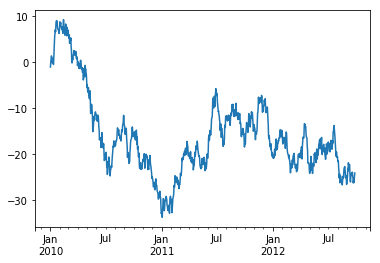

In [196]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2010', periods=1000))
ts = ts.cumsum()
ts.plot()

<Figure size 432x288 with 0 Axes>

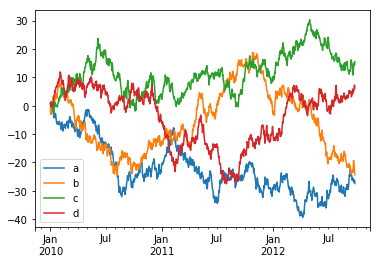

In [201]:
df11 = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['a','b','c','d'])
df11 = df11.cumsum()
plt.figure(); df11.plot(); plt.legend(loc='best')

---  
## Data I/O

In [202]:
df11.to_csv('foo.csv')

In [203]:
import os
os.listdir()

['.ipynb_checkpoints', 'foo.csv', 'Pandas_in_10_minutes.ipynb']

In [207]:
pd.read_csv('foo.csv').tail()

,Unnamed: 0,a,b,c,d
995,2012-09-22,-26.353662,-19.370652,13.368612,5.153922
996,2012-09-23,-26.712933,-20.652324,14.923816,5.198373
997,2012-09-24,-27.163723,-21.518409,15.026938,5.962613
998,2012-09-25,-26.260814,-22.658623,14.329627,7.232072
999,2012-09-26,-27.486809,-24.400101,15.498222,6.165745


In [213]:
df11.to_hdf('foo.h5', 'df')
os.listdir()
pd.read_hdf('foo.h5', 'df').tail()

,a,b,c,d
2012-09-22,-26.353662,-19.370652,13.368612,5.153922
2012-09-23,-26.712933,-20.652324,14.923816,5.198373
2012-09-24,-27.163723,-21.518409,15.026938,5.962613
2012-09-25,-26.260814,-22.658623,14.329627,7.232072
2012-09-26,-27.486809,-24.400101,15.498222,6.165745


In [218]:
df11.to_excel('foo.xlsx', sheet_name='Sheet1')
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA']).tail()

,a,b,c,d
2012-09-22,-26.353662,-19.370652,13.368612,5.153922
2012-09-23,-26.712933,-20.652324,14.923816,5.198373
2012-09-24,-27.163723,-21.518409,15.026938,5.962613
2012-09-25,-26.260814,-22.658623,14.329627,7.232072
2012-09-26,-27.486809,-24.400101,15.498222,6.165745


---
Gotchazzzz

In [219]:
if pd.Series([False, True, False]):
    print('Oops')

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().